<a href="https://colab.research.google.com/github/Amish-sherlekar/pro-113/blob/main/pro_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mean of all savings 85.32780331328739
mean of all savings 39.2724
mean of all savings 0.0
reminded data
Mean - 82.56940908263547 	 Median - 39.2724 	 Mode - 0.0
not reminded Data
Mean - 89.67095185226523 	 Median - 36.0475 	 Mode - 0.0
standard deviation of all savings, reminded, not_reminded
standard deviation of all savings is 196.75453011909315 	 standard deviation of reminded 173.24866414440817  	 standard deviation of reminded 228.875050299707
Correlation between age and saving is  {0.03663447975985462}


Q1 2.284
Q3 86.514
Iqr 84.22999999999999
Lower Range -124.06099999999998
Upper Range 212.85899999999998
Mean of new df 46.20051938981879 	 Median of new df - 36.0475 	 Mode of new df - 0.0
Standard deviation of new df 50.86687191728863


Std Of Sampling Data 5.202958081964065
Mean of Sampling Data 46.475425460845216


Corelation of Age And Savings of Sampling Data is {0.08561544120342092}
   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


Sampling Mean of Not Reminded 43.4957576740798
Sampling standard of Not Reminded 5.129104666252562


38.36665300782724 48.624862340332356
33.23754834157467 53.75396700658492
28.10844367532211 58.88307167283749
Sampling Mean of Reminded 47.45584103694037
Sampling Std of Reminded 4.955640895899375


z_score is 0.7720808251226227


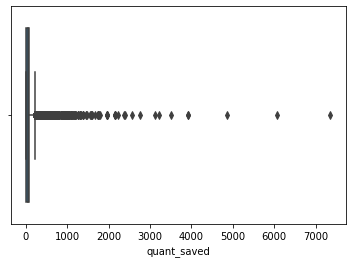

In [ ]:
import csv
import pandas as pd
import statistics
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as pg
import numpy as np
import seaborn as sns
import random

df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df, y="quant_saved", color="rem_any")
fig.show()
with open("savings_data_final.csv", newline="") as f:
    reader = csv.reader(f)
    data = list(reader)
data.pop(0)
totalEntries = len(data)
reminder = 0
for i in data:
    if int(i[3]) == 1:
        reminder += 1
fig = pg.Figure(
    pg.Bar(x=["reminded", "not reminded"], y=[reminder, totalEntries - reminder])
)
fig.show()
allSavings = []
for a in data:
    allSavings.append(float(a[0]))
print(f"mean of all savings {statistics.mean(allSavings)}")
print(f"mean of all savings {statistics.median(allSavings)}")
print(f"mean of all savings {statistics.mode(allSavings)}")
not_reminded = []
reminded = []
for b in data:
    if int(b[3]) == 1:
        reminded.append(float(b[0]))
    else:
        not_reminded.append(float(b[0]))
print("reminded data")
print(
    f"Mean - {statistics.mean(reminded)} \t Median - {statistics.median(reminded)} \t Mode - {statistics.mode(reminded)}"
)
print("not reminded Data")
print(
    f"Mean - {statistics.mean(not_reminded)} \t Median - {statistics.median(not_reminded)} \t Mode - {statistics.mode(not_reminded)}"
)
print("standard deviation of all savings, reminded, not_reminded")
print(
    f"standard deviation of all savings is {statistics.stdev(allSavings)} \t standard deviation of reminded {statistics.stdev(reminded)}  \t standard deviation of reminded {statistics.stdev(not_reminded)}"
)
age = []
savings = []
for c in data:
    if float(c[5]) != 0:
        age.append(float(c[5]))
        savings.append(float(c[0]))
correl = np.corrcoef(age, savings)
print("Correlation between age and saving is ", {correl[0, 1]})
fig = ff.create_distplot([df["quant_saved"].tolist()], ["savings"], show_hist=False)
fig.show()
sns.boxplot(data=df, x=df["quant_saved"])
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1
print("Q1", q1)
print("Q3", q3)
print("Iqr", iqr)
lowerRange = q1 - 1.5 * iqr
upperRange = q3 + 1.5 * iqr
print("Lower Range", lowerRange)
print("Upper Range", upperRange)
new_df = df[df["quant_saved"] < upperRange]
all_savings = new_df["quant_saved"].tolist()
print(
    f"Mean of new df {statistics.mean(all_savings)} \t Median of new df - {statistics.median(all_savings)} \t Mode of new df - {statistics.mode(all_savings)}"
)
print("Standard deviation of new df", statistics.stdev(all_savings))
fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["savings"], show_hist=False)
fig.show()
sampling_mean_list = []
for i in range(1000):
    temp_list = []
    for a in range(100):
        temp_list.append(random.choice(all_savings))
    sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling = statistics.mean(sampling_mean_list)
print("Std Of Sampling Data", statistics.stdev(sampling_mean_list))
print("Mean of Sampling Data", mean_sampling)
fig = ff.create_distplot(
    [sampling_mean_list], ["Savings For Sampling"], show_hist=False
)
fig.add_trace(
    pg.Scatter(
        x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="Sampling Mean"
    )
)
fig.show()
temp_df = new_df[new_df.age != 0]
new_age = temp_df["age"].tolist()
new_savings = temp_df["quant_saved"].tolist()
correl = np.corrcoef(new_age, new_savings)
print("Corelation of Age And Savings of Sampling Data is", {correl[0, 1]})
reminded_df = new_df.loc[new_df["rem_any"] == 1]
not_reminded_df = new_df.loc[new_df["rem_any"] == 0]
print(reminded_df.head())
print(not_reminded_df.head())
fig = ff.create_distplot(
    [not_reminded_df["quant_saved"].tolist()], ["Not Reminded Savings"], show_hist=False
)
fig.show()
not_reminded_savings = not_reminded_df["quant_saved"].tolist()
not_reminded_mean_list = []
for x in range(1000):
    newList = []
    for c in range(100):
        newList.append(random.choice(not_reminded_savings))
    not_reminded_mean_list.append(statistics.mean(newList))
not_reminded_sampling_mean = statistics.mean(not_reminded_mean_list)
not_reminded_sampling_standard = statistics.stdev(not_reminded_mean_list)
print("Sampling Mean of Not Reminded", not_reminded_sampling_mean)
print("Sampling standard of Not Reminded", not_reminded_sampling_standard)
fig = ff.create_distplot(
    [not_reminded_mean_list],
    ["savings for the sampling of not reminded"],
    show_hist=False,
)
fig.show()
first_standard_deviation_start, first_standard_deviation_end = (
    not_reminded_sampling_mean - not_reminded_sampling_standard,
    not_reminded_sampling_mean + not_reminded_sampling_standard,
)
second_standard_deviation_start, second_standard_deviationend = (
    not_reminded_sampling_mean - 2 * not_reminded_sampling_standard,
    not_reminded_sampling_mean + 2 * not_reminded_sampling_standard,
)
third_standard_deviation_start, third_standard_deviation_end = (
    not_reminded_sampling_mean - 3 * not_reminded_sampling_standard,
    not_reminded_sampling_mean + 3 * not_reminded_sampling_standard,
)
print(first_standard_deviation_start, first_standard_deviation_end)
print(second_standard_deviation_start, second_standard_deviationend)
print(third_standard_deviation_start, third_standard_deviation_end)
reminded_saving = reminded_df["quant_saved"].tolist()
reminded_mean_list = []
for x in range(1000):
    newList = []
    for c in range(100):
        newList.append(random.choice(reminded_saving))
    reminded_mean_list.append(statistics.mean(newList))
reminded_sampling_mean = statistics.mean(reminded_mean_list)
reminded_sampling_standard = statistics.stdev(reminded_mean_list)
print("Sampling Mean of Reminded", reminded_sampling_mean)
print("Sampling Std of Reminded", reminded_sampling_standard)
fig = ff.create_distplot(
    [reminded_mean_list], ["Savings For The Sampling Of Reminded"], show_hist=False
)
fig.show()
z_score = (
    reminded_sampling_mean - not_reminded_sampling_mean
) / not_reminded_sampling_standard
print("z_score is", z_score)


In [ ]:
from google.colab import files
dataLoad = files.upload()

Saving savings_data_final.csv to savings_data_final.csv
